In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns


### *** Tasks:Load and Explore the Data  Load the dataset into a Pandas DataFrame ***

df = pd.read_csv('heart_disease.csv')

In [121]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,resting blood pressure,serum cholostrol,maximum heart rate
0,52,1,0,125,212,0,1,168,0,0.222222,2,2.0,3.0,0,0.407895,0.351020,0.719008
1,53,1,0,140,203,0,0,155,1,0.688889,0,0.0,3.0,0,0.605263,0.314286,0.611570
2,70,1,0,145,174,0,1,125,1,0.577778,0,0.0,3.0,0,0.671053,0.195918,0.363636
3,61,1,0,148,203,0,1,161,0,0.000000,2,1.0,3.0,0,0.710526,0.314286,0.661157
4,62,0,0,138,294,0,1,106,0,0.422222,1,2.5,2.0,0,0.578947,0.685714,0.206612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.000000,2,0.0,2.0,1,0.605263,0.387755,0.685950
1021,60,1,0,125,258,0,0,141,1,0.622222,1,1.0,3.0,0,0.407895,0.538776,0.495868
1022,47,1,0,110,275,0,0,118,1,0.222222,1,1.0,2.0,0,0.210526,0.608163,0.305785
1023,50,0,0,110,254,0,0,159,0,0.000000,2,0.0,2.0,1,0.210526,0.522449,0.644628


In [123]:
df.isna().sum()

age                       0
sex                       0
cp                        0
trestbps                  0
chol                      0
fbs                       0
restecg                   0
thalach                   0
exang                     0
oldpeak                   0
slope                     0
ca                        0
thal                      0
target                    0
resting blood pressure    0
serum cholostrol          0
maximum heart rate        0
dtype: int64

In [125]:
df.dtypes

age                         int64
sex                         int64
cp                          int64
trestbps                    int64
chol                        int64
fbs                         int64
restecg                     int64
thalach                     int64
exang                       int64
oldpeak                   float64
slope                       int64
ca                        float64
thal                      float64
target                      int64
resting blood pressure    float64
serum cholostrol          float64
maximum heart rate        float64
dtype: object

In [127]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,resting blood pressure,serum cholostrol,maximum heart rate
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.0,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.260488,244.981463,0.0,0.529756,149.153171,0.336585,0.236054,1.385366,0.694146,2.327317,0.513171,0.490270,0.485639,0.563249
std,9.072290,0.460373,1.029641,16.532208,47.746162,0.0,0.527878,22.881210,0.472772,0.253748,0.617755,0.890414,0.609123,0.500070,0.217529,0.194882,0.189101
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.342105,0.346939,0.421488
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.0,1.000000,152.000000,0.000000,0.177778,1.000000,0.000000,2.000000,1.000000,0.473684,0.465306,0.586777
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.0,1.000000,166.000000,1.000000,0.400000,2.000000,1.000000,3.000000,1.000000,0.605263,0.608163,0.702479
max,77.000000,1.000000,3.000000,170.000000,371.000000,0.0,2.000000,202.000000,1.000000,1.000000,2.000000,2.500000,3.000000,1.000000,1.000000,1.000000,1.000000


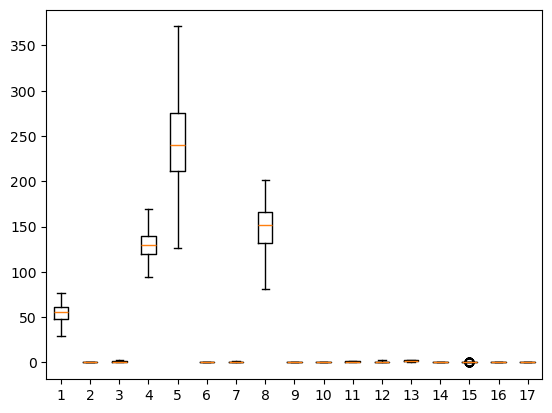

In [129]:
plt.boxplot(df)
plt.show()

In [130]:
def remove_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [133]:
num_cols = df.columns.tolist()
print(num_cols)


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'resting blood pressure', 'serum cholostrol', 'maximum heart rate']


In [135]:
for col in num_cols:
    df[col]=remove_outliers(df,col)

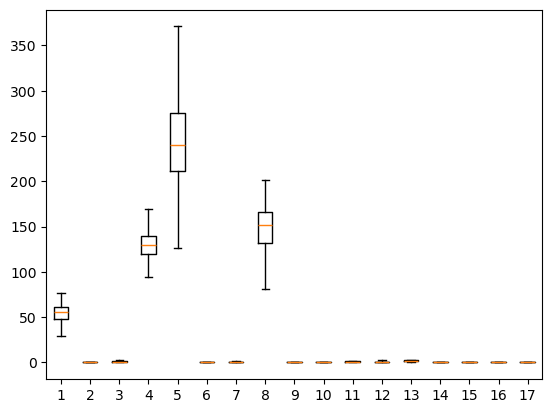

In [137]:
plt.boxplot(df)
plt.show()

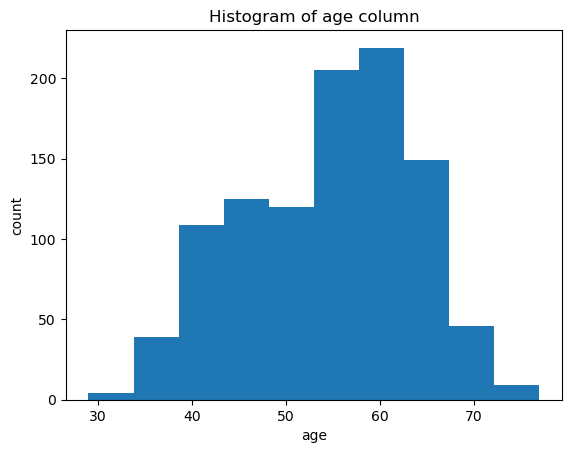

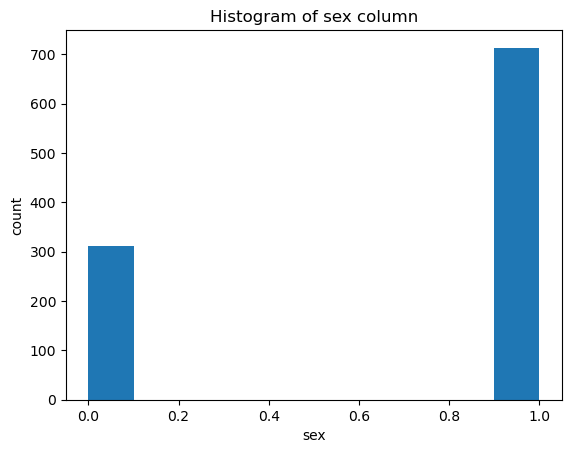

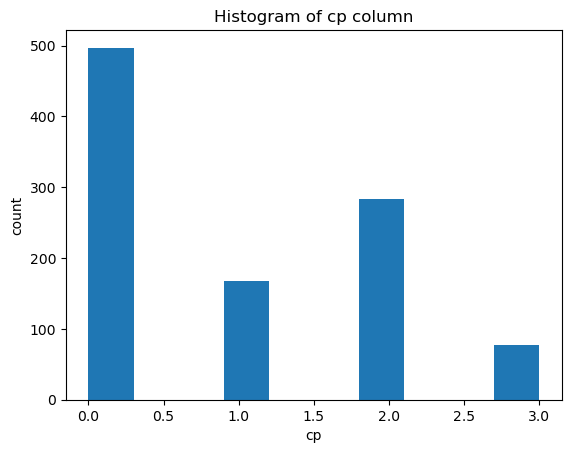

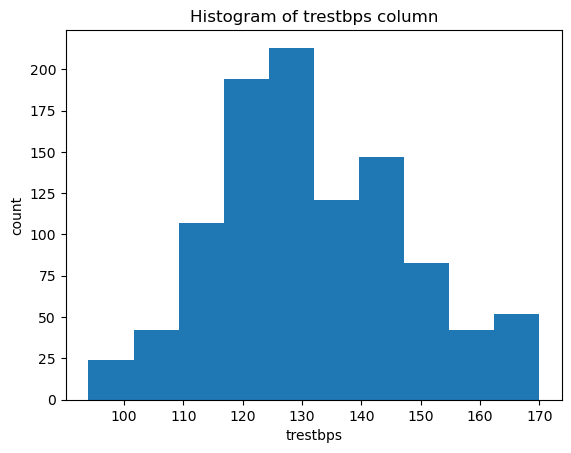

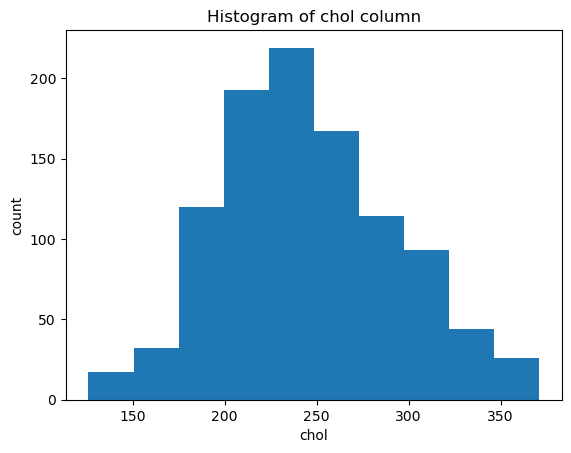

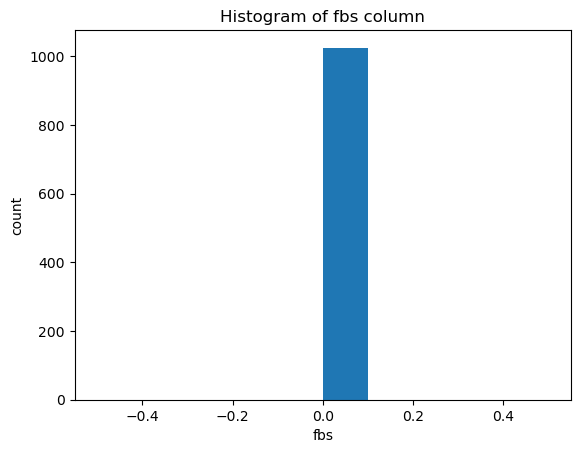

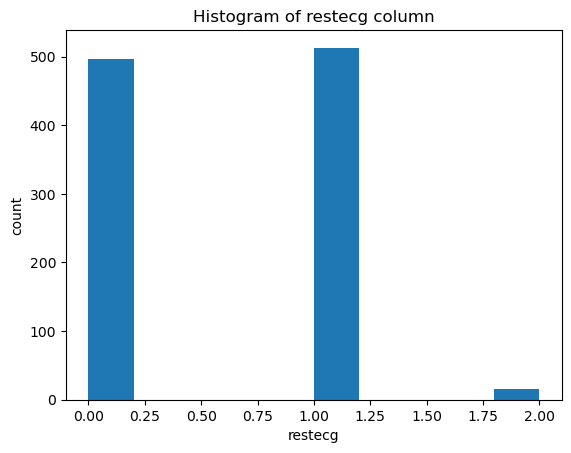

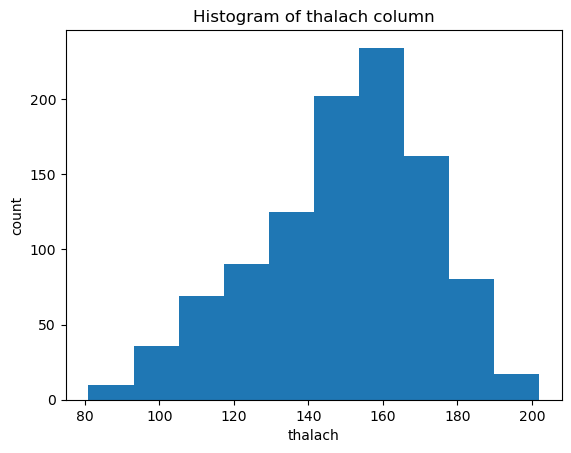

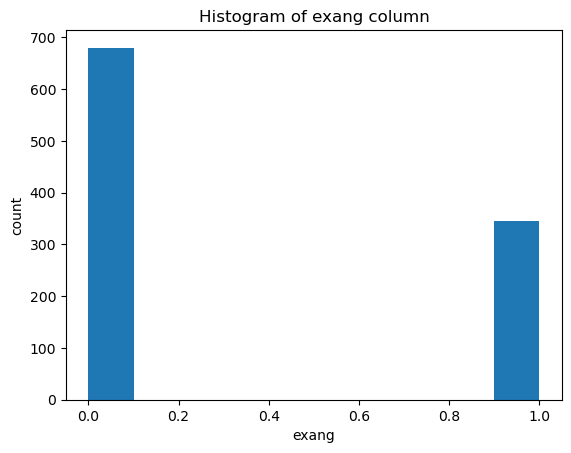

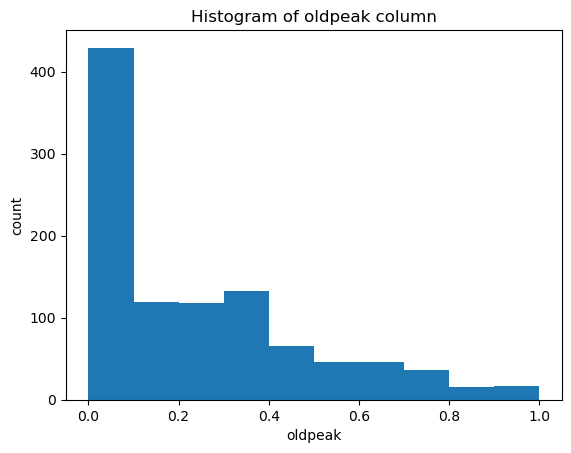

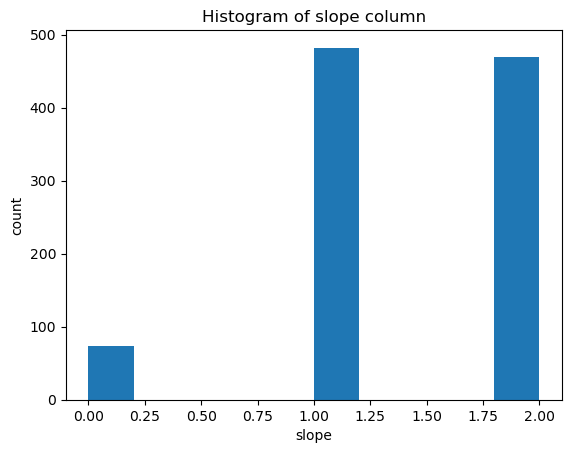

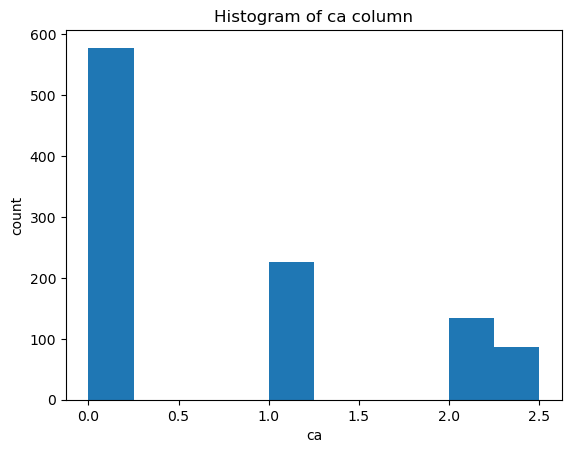

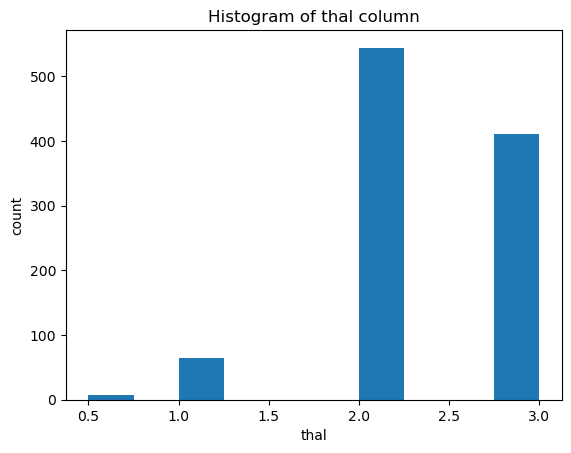

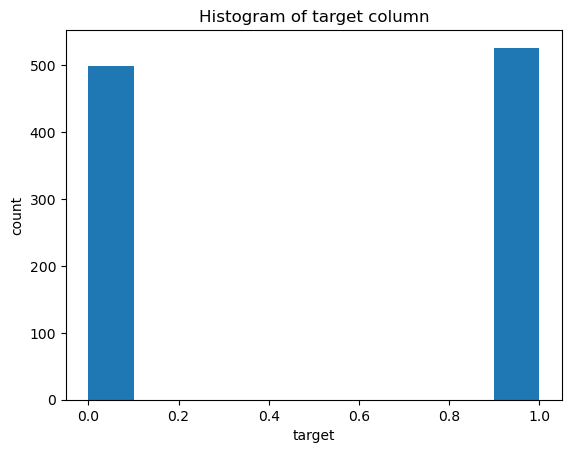

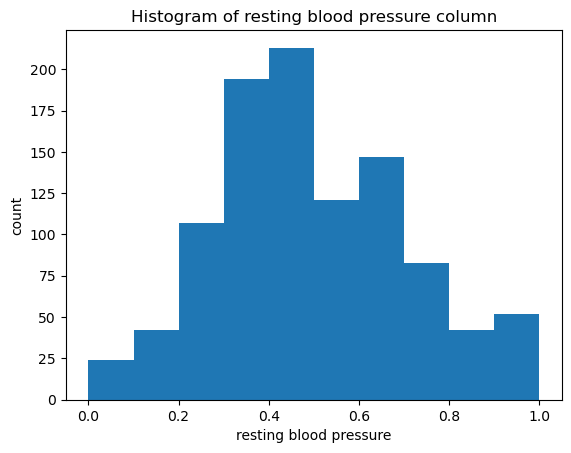

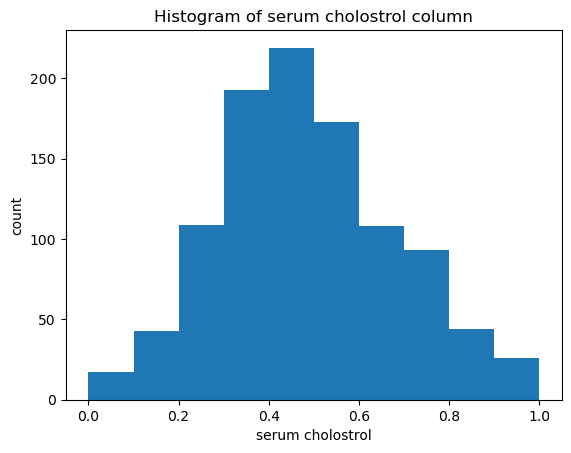

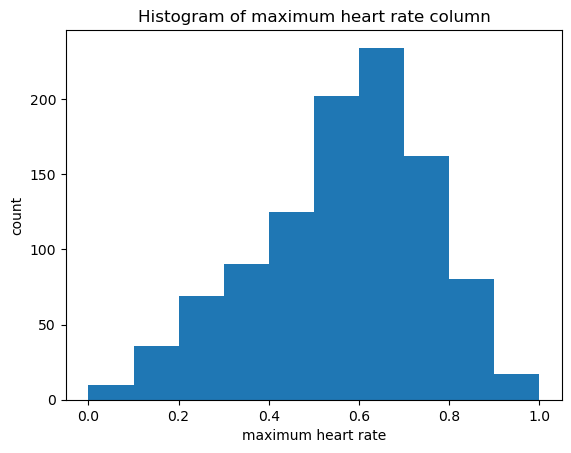

In [138]:
# There are no categorical columns in the dataset
for col in df.columns:
  plt.hist(df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

In [140]:
minmax_scaled = MinMaxScaler(feature_range=(0,1))
df['resting blood pressure'] = minmax_scaled.fit_transform(df[['trestbps']])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,resting blood pressure,serum cholostrol,maximum heart rate
0,52,1,0,125,212,0,1,168,0,0.222222,2,2.0,3.0,0,0.407895,0.351020,0.719008
1,53,1,0,140,203,0,0,155,1,0.688889,0,0.0,3.0,0,0.605263,0.314286,0.611570
2,70,1,0,145,174,0,1,125,1,0.577778,0,0.0,3.0,0,0.671053,0.195918,0.363636
3,61,1,0,148,203,0,1,161,0,0.000000,2,1.0,3.0,0,0.710526,0.314286,0.661157
4,62,0,0,138,294,0,1,106,0,0.422222,1,2.5,2.0,0,0.578947,0.685714,0.206612


In [141]:
minmax_scaled = MinMaxScaler(feature_range=(0,1))
df['serum cholostrol'] = minmax_scaled.fit_transform(df[['chol']])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,resting blood pressure,serum cholostrol,maximum heart rate
0,52,1,0,125,212,0,1,168,0,0.222222,2,2.0,3.0,0,0.407895,0.351020,0.719008
1,53,1,0,140,203,0,0,155,1,0.688889,0,0.0,3.0,0,0.605263,0.314286,0.611570
2,70,1,0,145,174,0,1,125,1,0.577778,0,0.0,3.0,0,0.671053,0.195918,0.363636
3,61,1,0,148,203,0,1,161,0,0.000000,2,1.0,3.0,0,0.710526,0.314286,0.661157
4,62,0,0,138,294,0,1,106,0,0.422222,1,2.5,2.0,0,0.578947,0.685714,0.206612


In [142]:
minmax_scaled = MinMaxScaler(feature_range=(0,1))
df['maximum heart rate'] = minmax_scaled.fit_transform(df[['thalach']])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,resting blood pressure,serum cholostrol,maximum heart rate
0,52,1,0,125,212,0,1,168,0,0.222222,2,2.0,3.0,0,0.407895,0.351020,0.719008
1,53,1,0,140,203,0,0,155,1,0.688889,0,0.0,3.0,0,0.605263,0.314286,0.611570
2,70,1,0,145,174,0,1,125,1,0.577778,0,0.0,3.0,0,0.671053,0.195918,0.363636
3,61,1,0,148,203,0,1,161,0,0.000000,2,1.0,3.0,0,0.710526,0.314286,0.661157
4,62,0,0,138,294,0,1,106,0,0.422222,1,2.5,2.0,0,0.578947,0.685714,0.206612


In [143]:
minmax_scaled = MinMaxScaler(feature_range=(0,1))
df['oldpeak'] = minmax_scaled.fit_transform(df[['oldpeak']])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,resting blood pressure,serum cholostrol,maximum heart rate
0,52,1,0,125,212,0,1,168,0,0.222222,2,2.0,3.0,0,0.407895,0.351020,0.719008
1,53,1,0,140,203,0,0,155,1,0.688889,0,0.0,3.0,0,0.605263,0.314286,0.611570
2,70,1,0,145,174,0,1,125,1,0.577778,0,0.0,3.0,0,0.671053,0.195918,0.363636
3,61,1,0,148,203,0,1,161,0,0.000000,2,1.0,3.0,0,0.710526,0.314286,0.661157
4,62,0,0,138,294,0,1,106,0,0.422222,1,2.5,2.0,0,0.578947,0.685714,0.206612


In [144]:
y = df['chol']
x = df[['age','sex','cp','trestbps','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [146]:
reg_lin = LinearRegression()
reg_lin.fit(x_train,y_train)
y_pred = reg_lin.predict(x_test)

In [147]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 1842.9989106699857
R2 Score: 0.15523573441688931


In [148]:
y_regr = df['chol']
X_regr = df.drop('chol', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_regr_train, X_regr_test, y_regr_train, y_regr_test = train_test_split(X_regr, y_regr, test_size=0.2, random_state=2)

In [149]:
y_class = df['target']
X_class = df.drop('target', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=2)

In [150]:
lr_model = LinearRegression() # create an object of the model
lr_model.fit(X_regr_train,y_regr_train)
predicted_lr_values = lr_model.predict(X_regr_test)
# in a line equation W1X1+X0
print("Intercept: ", lr_model.intercept_) # Intercept X0
print("Coefficient: ", lr_model.coef_) # Weight W1

Intercept:  125.99999999999818
Coefficient:  [ 2.38868462e-14  9.40813585e-14  9.70616141e-15 -1.91665104e-15
 -1.42108547e-14 -7.56834067e-15  3.33203876e-15 -1.49298041e-13
  4.51352374e-14 -1.41776592e-15 -2.89160895e-15  3.97243280e-14
  6.96762322e-14  4.74243614e-15  2.45000000e+02  2.82559298e-15]


In [151]:
logr_model = LogisticRegression()
logr_model.fit(X_class_train,y_class_train)
predicted_logr_values = logr_model.predict(X_class_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_class_train, y_class_train)
predicted_knn_values = knn_model.predict(X_class_test)
naive_bayes = GaussianNB()
naive_bayes.fit(X_class_train, y_class_train)

predicted_nb_values = naive_bayes.predict(X_class_test)
predicted_nb_values

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0], dtype=int64)

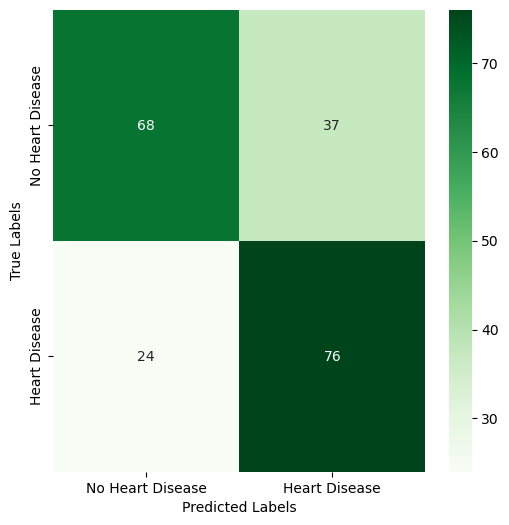

In [177]:
cm = confusion_matrix(y_class_test, predicted_knn_values)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels = ["No Heart Disease", "Heart Disease"],yticklabels = ["No Heart Disease", "Heart Disease"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
mae = mean_absolute_error(y_regr_test, predicted_lr_values)
mse = mean_squared_error(y_regr_test, predicted_lr_values)
r_squared = r2_score(y_regr_test, predicted_lr_values)

metrics = {
    'Metric': ['MAE', 'MSE', 'R2 Score'],
    'Value': [mae, mse, r_squared]
}

metrics_df = pd.DataFrame(metrics)

print("\nLinear Regression Evaluation")
metrics_df

In [156]:
test_accuracy = accuracy_score(y_class_test, predicted_logr_values)
test_precision = precision_score(y_class_test, predicted_logr_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_logr_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_logr_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nLogistic Regression Evaluation")
metrics_df


Logistic Regression Evaluation


,Metric,Value
0,Accuracy,0.882927
1,Precision,0.892876
2,Recall,0.882927
3,F1 Score,0.882435


In [158]:
test_accuracy = accuracy_score(y_class_test, predicted_knn_values)
test_precision = precision_score(y_class_test, predicted_knn_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_knn_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_knn_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nK-Nearest Neighbours Evaluation")
metrics_df


K-Nearest Neighbours Evaluation


,Metric,Value
0,Accuracy,0.702439
1,Precision,0.706660
2,Recall,0.702439
3,F1 Score,0.701702


In [160]:

test_accuracy = accuracy_score(y_class_test, predicted_nb_values)
test_precision = precision_score(y_class_test, predicted_nb_values, average='weighted')
test_recall = recall_score(y_class_test, predicted_nb_values, average='weighted')
test_f1 = f1_score(y_class_test, predicted_nb_values, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [test_accuracy, test_precision, test_recall, test_f1]
}

metrics_df = pd.DataFrame(metrics)

print("\nNaive Bayes Evaluation")
metrics_df


Naive Bayes Evaluation


,Metric,Value
0,Accuracy,0.863415
1,Precision,0.865896
2,Recall,0.863415
3,F1 Score,0.863337
